In [9]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from collections.abc import Callable

              t            y      y_exact        error
0  1.0000000000 1.0000000000 0.0000000000 1.0000000000
1  1.1000000000 1.1000000000 0.0411044424 1.0588955576
2  1.2000000000 1.2000000000 0.0628945147 1.1371054853
3  1.3000000000 1.3000000000 0.0722409471 1.2277590529
4  1.4000000000 1.4000000000 0.0734585435 1.3265414565
5  1.5000000000 1.5000000000 0.0693440008 1.4306559992
6  1.6000000000 1.6000000000 0.0617588352 1.5382411648
7  1.7000000000 1.7000000000 0.0519701819 1.6480298181
8  1.8000000000 1.8000000000 0.0408569895 1.7591430105
9  1.9000000000 1.9000000000 0.0290385327 1.8709614673
10 2.0000000000 2.0000000000 0.0169566105 1.9830433895


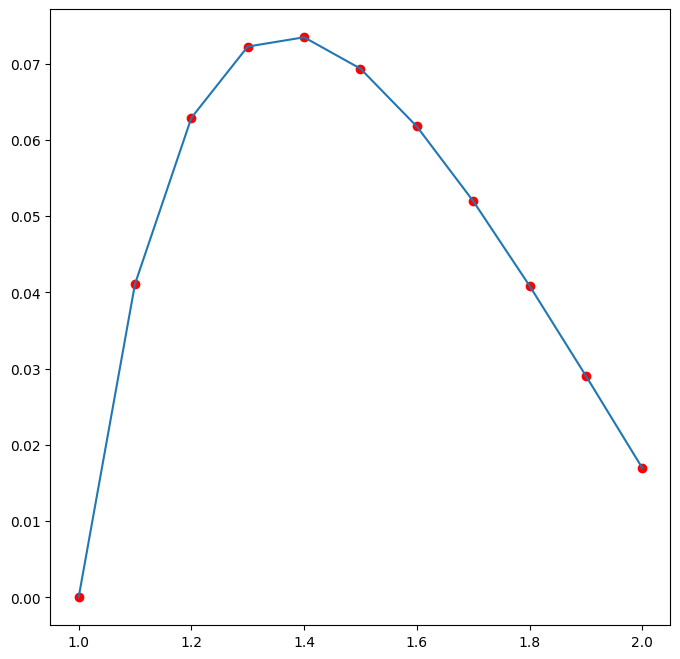

In [10]:
def Rungkutta4(f: Callable[[np.float64, np.float64], np.float64],
               t_span: np.ndarray,
               y_init: np.float64,
               n: int) -> pd.DataFrame:

    c = np.array(object=[0, 1/2, 1/2, 1], dtype=np.float64)

    a = np.array(object=[[0, 0, 0, 0],
                         [1/2, 0, 0, 0],
                         [0, 1/2, 0, 0],
                         [0, 0, 1, 0]], dtype=np.float64)

    b = np.array(object=[1/6, 1/3, 1/3, 1/6], dtype=np.float64)
    
    # print(a)
    # print(b)
    # print(c)

    h = (t_span[1]-t_span[0])/n
    t = np.linspace(start=t_span[0], stop=t_span[1], num=n+1, dtype=np.float64)
    y = np.full_like(a=t, fill_value=np.nan, dtype=np.float64)

    y[0] = y_init

    for i in range(0, n, 1):
        k0 = f(t[i], y[i])
        k1 = f([i]+c[1]*h, y[i]+(a[1, 0]*k0)*h)
        k2 = f([i]+c[2]*h, y[i]+(a[2, 0]*k0 + a[2, 1]*k1)*h)
        k3 = f([i]+c[3]*h, y[i]+(a[3, 0]*k0 + a[3, 1]*k1 + a[3, 2]*k2)*h)

        y[i+1] = y[i] + h*(b[0]*k0 + b[1]*k1 + b[2]*k2 + b[3]*k3)
        
    df = pd.DataFrame({'t': t, 'y': t}, dtype=np.float64)
    return df


if __name__ == "__main__":
    
    def f(t:np.float64,y:np.float64)->np.float64:
        return t**(-2)*(np.cos(t)-2*t*y)
    
    t_span = np.array(object=[1,2],dtype=np.float64)
    y_init = 0.0
    n = 10
    
    def y(t:np.float64)->np.float64:
        return t**(-2)*(np.sin(t)-np.sin(1))         
    
    df = Rungkutta4(f=f,t_span=t_span,y_init=y_init,n=n)
    df['y_exact'] = df['t'].apply(func=y)
    df['error'] = (df['y_exact'] - df['y']).abs()
    pd.options.display.float_format = '{:.10f}'.format
    
    df.style.format(precision=10).to_latex(buf='RungeKutta4.tex')
    df.style.format(precision=10).to_excel(excel_writer='Rungkutta4.xlsx')
    
    print(df)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df['t'],df['y_exact'],'-')
    ax.scatter(df['t'],df['y_exact'],color='red')
    plt.show()    

In [11]:
df

,t,y,y_exact,error
0,1.0000000000,1.0000000000,0.0000000000,1.0000000000
1,1.1000000000,1.1000000000,0.0411044424,1.0588955576
2,1.2000000000,1.2000000000,0.0628945147,1.1371054853
3,1.3000000000,1.3000000000,0.0722409471,1.2277590529
4,1.4000000000,1.4000000000,0.0734585435,1.3265414565
5,1.5000000000,1.5000000000,0.0693440008,1.4306559992
6,1.6000000000,1.6000000000,0.0617588352,1.5382411648
7,1.7000000000,1.7000000000,0.0519701819,1.6480298181
8,1.8000000000,1.8000000000,0.0408569895,1.7591430105
9,1.9000000000,1.9000000000,0.0290385327,1.8709614673


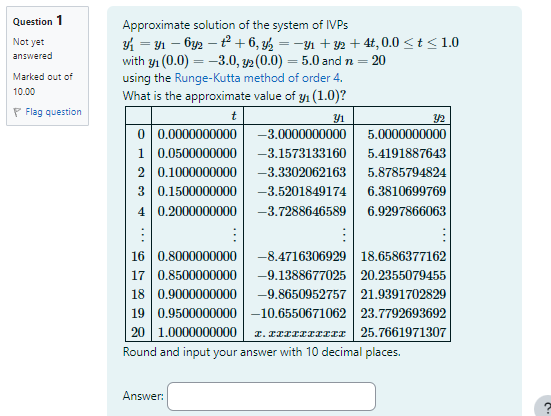

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def runge_kutta4(f1, f2, t_span, y_init, n):
    h = (t_span[1] - t_span[0]) / n
    t = np.linspace(t_span[0], t_span[1], n+1)
    y1 = np.zeros(n+1)
    y2 = np.zeros(n+1)

    y1[0] = y_init[0]
    y2[0] = y_init[1]

    for i in range(n):
        k1_y1 = f1(t[i], y1[i], y2[i])
        k1_y2 = f2(t[i], y1[i], y2[i])

        k2_y1 = f1(t[i] + h/2, y1[i] + (h/2) * k1_y1, y2[i] + (h/2) * k1_y2)
        k2_y2 = f2(t[i] + h/2, y1[i] + (h/2) * k1_y1, y2[i] + (h/2) * k1_y2)

        k3_y1 = f1(t[i] + h/2, y1[i] + (h/2) * k2_y1, y2[i] + (h/2) * k2_y2)
        k3_y2 = f2(t[i] + h/2, y1[i] + (h/2) * k2_y1, y2[i] + (h/2) * k2_y2)

        k4_y1 = f1(t[i] + h, y1[i] + h * k3_y1, y2[i] + h * k3_y2)
        k4_y2 = f2(t[i] + h, y1[i] + h * k3_y1, y2[i] + h * k3_y2)

        y1[i+1] = y1[i] + (h/6) * (k1_y1 + 2*k2_y1 + 2*k3_y1 + k4_y1)
        y2[i+1] = y2[i] + (h/6) * (k1_y2 + 2*k2_y2 + 2*k3_y2 + k4_y2)

        print(y1[i+1],y2[i+1])

    return y1, y2

def f1(t, y1, y2):
    return y1 - 6*y2 - t**2 + 6

def f2(t, y1, y2):
    return -y1 + y2 + 4*t

t_span = [0.0, 1.0]
y_init = [-3.0, 5.0]
n = 20

y1_values, y2_values = runge_kutta4(f1, f2, t_span, y_init, n)
approx_y1_1 = y1_values[-1]

print("Approximate value of y1(1.0):", approx_y1_1)

-4.450488326822917 5.451235690104166
-6.131269773037257 6.015887376197343
-8.092085192656615 6.712807015961651
-10.3915787494457 7.564583024149426
-13.099006030811935 8.59823049753443
-16.296261449548613 9.846012285620127
-20.08028519338488 11.346415473380585
-24.565921314657377 13.145312471155272
-29.889312018751365 15.297341406685863
-36.21192921191194 17.867547049154478
-43.72536338385354 20.933331259808256
-52.65701249539675 24.5867711898618
-63.27684038998623 28.937374408965137
-75.905406151094 34.11535317350393
-90.92340373661445 40.27551552178764
-108.78299626693965 47.60188927432357
-130.02128286880418 56.31321687029339
-155.27629957842214 66.66948493770208
-185.30603138159017 78.97968334878175
-221.01100226902074 93.61102517418846
Approximate value of y1(1.0): -221.01100226902074


In [4]:
from collections.abc import Callable
from typing import Optional

def RungeKuttaFehlberg45(f: Callable[[np.float64, np.float64], np.float64],
                         t_span: np.ndarray,
                         y_init: np.float64,
                         h_max: Optional[np.float64] = 2.5e-1,
                         h_min: Optional[np.float64] = 1.e-4,
                         tol: Optional[np.float64] = 1.e-10
                         ) -> pd.DataFrame:
    """
    TODO
    ----------
    Approximate first-order IVP ODE of the form

    `y'=f(t,y), y(a)=alpha, a<= t <= b.`

    by adaptive Runge-Kutta-Fehlberg method with order 4 and 5.

    Parameters
    ----------
    `f: callable`
        the function `f(t,y)` on the right-hand side
    `t_span: np.ndarray`
        closed interval `[a, b]`
    `y_init: np.float64`
        initial value of `y`
    `h_max: Optional[np.float64] = 2.5e-1`
        upper threshold for step size `h`
    `h_min: Optional[np.float64] = 1.e-4`
        lower threshold for step size `h`
    `tol: Optional[np.float64] = 1.e-10`
        desire tolerance

    Return
    ----------
    `pd.DataFrame`
        table of `t` and `y`
    """
    t = t_span[0]
    y = y_init
    h = h_max
    i = 0
    df = pd.DataFrame(data={'t': [t], 'h': [None], 'y': [y]})
    
    # TODO: Butcher tableau of Runge-Kutta-Fehlberg of order 4 and 5
    c = np.array(object=[0., 1./4., 3./8., 12./13., 1., 1./2.], dtype=np.float64)
    a = np.array(object=[[0., 0., 0., 0., 0.],
                         [1./4., 0., 0., 0., 0.],
                         [3./32., 9./32., 0., 0., 0.],
                         [1932./2197., -7200./2197., 7296./2197., 0., 0.],
                         [439./216., -8., 3680./513., -845./4104., 0.],
                         [-8./27., 2., -3544./2565., 1859./4104., -11./40.]], dtype=np.float64)
    b = np.array(object=[25./216., 0., 1408./2565., 2197./4104., -1./5.], dtype=np.float64)
    # bp = np.array(object=[25./216., 0., 1408./2565., 2197./4104., -1./5., 0.], dtype=np.float64)
    # db = b - bp
    db = np.array(object=[1./360., 0., -128./4275., -2197./75240., 1./50., 2./55.], dtype=np.float64)
    flag = 1
    
    while flag:
        k0 = f(t, y)
        k1 = f(t + c[1]*h, y + (a[1, 0]*k0)*h)
        k2 = f(t + c[2]*h, y + (a[2, 0]*k0 + a[2, 1]*k1)*h)
        k3 = f(t + c[3]*h, y + (a[3, 0]*k0 + a[3, 1]*k1 + a[3, 2]*k2)*h)
        k4 = f(t + c[4]*h, y + (a[4, 0]*k0 + a[4, 1]*k1 + a[4, 2]*k2 + a[4, 3]*k3)*h)
        k5 = f(t + c[5]*h, y + (a[5, 0]*k0 + a[5, 1]*k1 + a[5, 2]*k2 + a[5, 3]*k3 + a[5, 4]*k4)*h)
        r = abs(db[0]*k0 + db[1]*k1 + db[2]*k2 + db[3]*k3 + db[4]*k4 + db[5]*k5)
        
        # TODO: Check if the truncation error r is acceptable
        if r <= tol:
            t = t + h
            y = y + (b[0]*k0 + b[1]*k1 + b[2]*k2 + b[3]*k3 + b[4]*k4) * h
            i = i + 1
            df.loc[i, :] = [t, h, y]
        d = 0.84*(tol / r)**(1./4.)
        
        # TODO: Control the factor d by 0.1 <= h_new / h_old <= 4.0
        if d < 0.1:
            d = 0.1
        elif d > 4.0:
            d = 4.0
        h = d * h
        
        # TODO: Control h with constraint h <= h_max
        if h > h_max:
            h = h_max
        
        # TODO: Check if last step reached
        if t >= t_span[1]:
            flag = 0
            print(f':) Successfully completed with {i} steps!')
        elif t + h > t_span[1]:
            h = t_span[1] - t
        
        # TODO: Check if h is too small
        elif h < h_min:
            flag = 0
            print(f':( At i = {i}, h_i = {h} < h_min = {h_min}.')
    return df


if __name__ == "__main__":
    def f(t: np.float64, y: np.float64) -> np.float64:
        return y - t**2 + 1
    t_span = np.array(object=[0, 2], dtype=np.float64)
    y_init = 0.5
    h_min = 1e-2
    h_max = 0.25
    tol = 1e-5
    df = RungeKuttaFehlberg45(f=f,
                              t_span=t_span,
                              y_init=y_init,
                              h_min=h_min,
                              h_max=h_max,
                              tol=tol)
    pd.options.display.float_format="{:.10f}".format
    print(df)

:) Successfully completed with 9 steps!
             t            h            y
0 0.0000000000         None 0.5000000000
1 0.2500000000 0.2500000000 0.9204886021
2 0.4865522023 0.2365522023 1.3964910143
3 0.7293331998 0.2427809976 1.9537487872
4 0.9793331998 0.2500000000 2.5864260147
5 1.2293331998 0.2500000000 3.2604605105
6 1.4793331998 0.2500000000 3.9520955373
7 1.7293331998 0.2500000000 4.6308268195
8 1.9793331998 0.2500000000 5.2574860646
9 2.0000000000 0.0206668002 5.3054896274


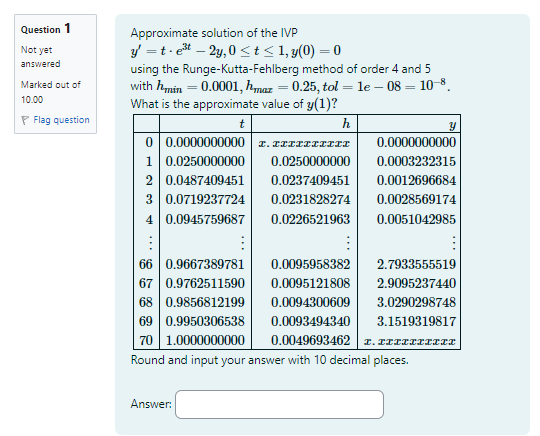

In [6]:
if __name__ == "__main__":
    def f(t: np.float64, y: np.float64) -> np.float64:
        return t*np.exp(3*t) - 2*y 
    
    t_span = np.array(object=[0,1], dtype=np.float64)
    y_init = 0
    h_min = 1e-04
    h_max = 0.25
    tol = 1e-08
    
    df = RungeKuttaFehlberg45(f=f,
                              t_span=t_span,
                              y_init=y_init,
                              h_min=h_min,
                              h_max=h_max,
                              tol=tol)
    pd.options.display.float_format="{:.10f}".format
    print(df)

:) Successfully completed with 70 steps!
              t            h            y
0  0.0000000000         None 0.0000000000
1  0.0250000000 0.0250000000 0.0003232315
2  0.0487409451 0.0237409451 0.0012696684
3  0.0719237724 0.0231828274 0.0028569174
4  0.0945759687 0.0226521963 0.0051042985
..          ...          ...          ...
66 0.9667389781 0.0095958382 2.7933555519
67 0.9762511590 0.0095121808 2.9095237440
68 0.9856812199 0.0094300609 3.0290298748
69 0.9950306538 0.0093494340 3.1519319817
70 1.0000000000 0.0049693462 3.2190993167

[71 rows x 3 columns]


In [5]:
if __name__ == "__main__":
    def f(t: np.float64, y: np.float64) -> np.float64:
        return t**(-2) * (np.sin(2*t) - 2*t*y)
    
    t_span = np.array(object=[1,2], dtype=np.float64)
    y_init = 2
    h_min = 1e-04
    h_max = 0.25
    tol = 1e-08
    
    df = RungeKuttaFehlberg45(f=f,
                              t_span=t_span,
                              y_init=y_init,
                              h_min=h_min,
                              h_max=h_max,
                              tol=tol)
    pd.options.display.float_format="{:.10f}".format
    print(df)

:) Successfully completed with 33 steps!
              t            h            y
0  1.0000000000         None 2.0000000000
1  1.0180144287 0.0180144287 1.9455158263
2  1.0359930710 0.0179786423 1.8934091294
3  1.0545421053 0.0185490343 1.8418625782
4  1.0736707986 0.0191286933 1.7908983244
5  1.0934050270 0.0197342284 1.7404931389
6  1.1137716248 0.0203665978 1.6906247643
7  1.1347988628 0.0210272380 1.6412708420
8  1.1565165086 0.0217176458 1.5924090400
9  1.1789558985 0.0224393899 1.5440171699
10 1.2021500084 0.0231941099 1.4960733281
11 1.2261335232 0.0239835148 1.4485560655
12 1.2509429028 0.0248093796 1.4014445859
13 1.2766164438 0.0256735410 1.3547189806
14 1.3031943349 0.0265778911 1.3083605014
15 1.3307187040 0.0275243691 1.2623518766
16 1.3592336542 0.0285149501 1.2166776747
17 1.3887852876 0.0295516335 1.1713247189
18 1.4194217140 0.0306364263 1.1262825564
19 1.4511930407 0.0317713267 1.0815439850
20 1.4841513447 0.0329583040 1.0371056368
21 1.5183506224 0.0341992777 0.9929